# BUAD 311: Operations Management Notes
By: Chengyi (Jeff) Chen

In Operations Management, we care about:
1. Finding **bottlenecks** so that we can analyze how to optimize processes to increase order flow / product sales
2. Solution on how to Optimize:
    1. Add capacity to the bottleneck (if the value of the extra capacity exceeds the cost of the extra capacity)
    2. Improve balance by moving work from the bottleneck activity to a non-bottleneck activity (e.g., cross-training)
    3. Determine the best span of control for a worker (e.g., is there benefit in specialization?)
    4. Stimulate demand (e.g., discounts, higher quality, more product variety or shorter lead time)

### Table of Contents:
1. [1 Product, 1 Flow](#singleproduct)
2. [Multiproduct, Multiflow](#multiproduct)

## Preliminaries

### Terminology
1. Capacity
    - Number of units processed / hr
2. Flow Rate

In [57]:
import numpy as np
import pandas as pd
import pandasql as pdsql
import matplotlib.pyplot as plt

# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)
get_colors = lambda length: plt.get_cmap('Spectral')(np.linspace(0, 1.0, length))

In [58]:
# plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (18, 12)

---
# 1 Product, 1 Flow<a id='singleproduct'></a>

## Case 1: Kristen's Cookie Company (A1) 

Kristen's Cookie Company's selling point: 
1. Made to bake cookies
2. Customizable

Physical Operations (PO):
1.	Wash equipment and mix cookie ingredients 
    - Hold <= 36 cookies / batch, 6 min, You
2.	Spoon cookies 
    - 12 cookies / tray, 2 min, You
3.	Put cookies in oven and timer 
    - 1 tray, 1 min, Roommate
4.	Bake cookies 
    - 1 tray, 9 min, Roommate
5.	Remove and cool 
    - 5 min, Roommate
6.	Pack cookies 
    - 2 min / 12 cookies, Roommate
7.	Accept payment 
    - 1 min, Roommate

Variable Costs:
1. Cost of Ingredients 
    - USD 0.60 / 12 cookies or USD 0.05 / cookie
2. Cost of box 
    - USD 0.10 / box (holds 12 cookies) or USD 0.00833 / cookie

1.	How long will it take you to fill a rush order?
    - Time to fill Rush Order assumming 1. An order <= 12 cookies, 2. No need to preheat oven 
        - 26 min

2.	How many orders can you fill in a night, assuming you are open four hours (240 min) each night?
    - Assuming that Demand for cookies is always high, meaning every night has infinitely many orders to fill:
        - Best Case Scenario:
            1. All orders come in before we start baking
            2. Any customer that orders orders the exact same type of cookie (customizability option is ignored)
                - Number of orders (order - 12 cookies) / night: 22 orders (*Refer to excel file analysis*)
        - Worst Case Scenario:
            1. Every customer orders a different customization  and only has a single order of dozen (Meaning that at any point in time max utilization of electric mixer is 33.33\%)
                - Number of orders (order - 12 cookies) / night: 22 orders (*Refer to excel file analysis*)
     - Because bottleneck is at roommates side, best case and worst case scenario has the same maximum number of orders fillable because customization affects my side of the process. 

3.	How much of your own and your roommate’s valuable time will it take to fill each order?
    - Assuming **valuable time** is defined as *non-idle time dedicated for a single order*:
        - Case 1: Assuming open 4 hours a night:
            - You 
                - 92 min / 22 orders = 4.18 min / order on average
            - Roommate 
                - (236 min
                - $-$ (8 min waiting for first batch of cookie dough 
                    - $+$ 9 min waiting for first order of cookies to bake 
                    - $+$ 10 odd orders * 2 min waiting for previous cookies to finish baking 
                    - $+$ 10 even orders * 2 min waiting for previous cookies to finish baking)
                - ) / 22 orders = 8.14 min / order on average
        - Case 2: Assuming first order:
            - You 
                - PO1 (6 min) + PO2 (2 min) = 8 min
            - Roommate
                - PO3 (1 min) + PO6 (2 min) + PO7 (1 min) = 4 min

4.	Because your baking trays can hold exactly one dozen cookies, you will produce and sell cookies by the dozen. Should you give any discount for people who order two dozen cookies, three dozen cookies, or more? If so, how much? Will it take you any longer to fill a two-dozen cookie order than a one-dozen cookie order?

    - Minimum Wage in California 2019 - USD 12.00 / hr (USD 0.20 / min)
    - Every subseqent dozen of cookies take 10 min to fill
    - Assuming a person orders only a single customization of cookies:
        - 1 dozen of cookies
            - Total cost / dozen cookies 
            - = Fixed cost / dozen cookies assuming Case 2 + Variable cost / dozen cookies 
            - = (USD 0.20 / min * (8 min + 4 min)) + (USD 0.70 / dozen cookies)
            - = USD 3.00 / dozen cookies
        - 2 dozen of cookies
            - Total cost / dozen cookies 
            - = Fixed cost / dozen cookies assuming Case 2 + Variable cost / dozen cookies 
            - = ((USD 0.20 / min * (10 min + 8 min)) + (2 * USD 0.70 / dozen cookies)) / 2
            - = USD 2.50 / dozen cookies
        - 3 dozen of cookies
            - Total cost / dozen cookies 
            - = Fixed cost / dozen cookies assuming Case 2 + Variable cost / dozen cookies 
            - = ((USD 0.20 / min * (12 min + 12 min)) + (3 * USD 0.70 / dozen cookies)) / 3
            - = USD 2.30 / dozen cookies
                
    - Assuming we want to maintain a profit margin of 20\%,
        - Revenue / dozen cookies: 3.60 / dozen cookies
        - Hence, we can give up to 
            - $\frac{USD 3.60 - (USD 2.50 * 120\%)}{USD 3.60} = \frac{USD 3.60 - USD 3.00}{USD 3.60} =  \frac{USD 0.60}{USD 3.60} = 16.67\%$ discount for 2 dozen cookies orderred **OR**
            - $\frac{USD 3.60 - (USD 2.30 * 120\%)}{USD 3.60} = \frac{USD 3.60 - USD 2.76}{USD 3.60} =  \frac{USD 0.84}{USD 3.60} = 23.33\%$ discount for 3 dozen cookies orderred

5. How many electric mixers and baking trays will you need?

    - Since we're using a capacity of 3 dozen cookies per mixer this case, we'll only need 1 mixer since it's really only used once to mix the cookie dough
    - With a max capacity of 3 dozen cookies per electric mixer, we will need at least 3 trays

6. Are there any changes you can make in your production plans that will allow you to make better cookies or more cookies in less time or at lower cost? For example, is there a bottleneck operation in your production process that you can expand cheaply? What is the effect of adding another oven? How much would you be willing to pay to rent an additional oven?

    - The bottleneck is the oven since the Roommate wastes 2 min between subsequent processing of orders
    - Renting an additional oven would help us eliminate that 2 min wasted between subsequent orders waiting for the single oven to finish baking the cookies. 
    - For the 22 orders previously, we wasted 40 min in total waiting for the oven to finish baking the previous batch of cookies. Because the rate at which I prepare the cookie mix for my roomate to place into the oven far exceeds his / her process rate, if we had 2 ovens, and before optimizing the processes further with the two ovens, at minimumn, we have 40 min extra to process orders, increasing the minimum bound on our max order capacity from 22 to 26 orders per night. That translates to a minimum of USD 0.60 * 4 = USD 2.40 extra profit / night (again assuming infinite demand and no discounts given for orders about a dozen). Hence, with our unoptimized process, we'll be willing to pay USD 2.40 / night for renting the additional oven to break-even but satisfy more customers.
    - Also, it might be good to hire someone else to help out with the roommate's section of the process, (along with this, buy more trays and electric mixers... However, all this really depends on the expected demand).

### Burgers Process Workflow example

Data:

$$
\begin{aligned}
&\text{Time to finish Initial Batch = 1 min 27 sec} \\
&\text{Initial Batch = 10 burgers} \\
&\text{Order Size = 60 burgers} \\
&\text{Capacity = 20 burgers/min} \\
\end{aligned}
$$

$$
\begin{aligned}
\text{Time to Fill Order} &\approx \text{Time to finish Initial Batch} + \frac{(\text{Order Size = 60 burgers}) - (\text{Initial Batch = 10 burgers})}{\text{Capacity = 20 burgers/min}} \\
&\approx \text{3 min 57 sec}
\end{aligned}
$$

Process Flow diagram:
- Dough mixers $\rightarrow$ Mix 6min $\rightarrow$ Load tray 2min $\rightarrow$ set oven 1min $\rightarrow$ bake 9min $\rightarrow$ cool 5min $\rightarrow$ pack 2min $\rightarrow$ pay 1min
- Mixer + Kristen $\rightarrow$ Mixer + Kristen $\rightarrow$ Kristen + Trays $\rightarrow$ Oven + Trays + Roommate $\rightarrow$ oven + tray $\rightarrow$ tray $\rightarrow$ Roommate $\rightarrow$ Roommate

Resources:
- oven
- mixer
- cooking trays
- kristen
- roommate

Q1: What is the capacity of each resource?

Time / dozen:
- Kristen: 6 + 2 = 8min
- Roommate: 1 + 2 + 1 = 4min
- Oven: 1 + 9 = 10min
- Mixer: 6min

Capacity: Dozen / hr
- Kristen: 60 / 8min = 7.5 dozen / hr
- Roommate: 60 / 4min = 15 dozen / hr
- Oven: 60 / 10min = 6 dozen / hr
- Mixer: 60 / 6min = 10 dozen / hr

Q2: What is the bottleneck? What is the process capacity?

Bottleneck: Oven

Utilization rate:
- Kristen: 6 * 100 / 7.5
- Roommate: 6 * 100 /15 = 
- Oven: 100\%
- Mixer: 6 * 100 / 10 = 

Process Capacity:
- 1 dozen / 10 min = 6 dozen / hr (Slowest resource is the oven)

Q3: What is the flow time of the first unit? (How long it takes to fill a rush order)
- Flow time: How long it takes for us to run through the process once
- 26 min

Q4: How many can you fill anight assuming you open 4hrs a night
- 26 min for first batch
- 10 min for subsequent batch
- floor(214 / 10) + 1 = 21 + 1 = 22 orders / night

Q5: What is the process capacity for 2 ovens, order size 1 dozen? How many can you make / night?
- We can run everything in parallel right after roommate has placed the first batch of cookies in, making our time to fill 2 dozen 34 min instead, hence every subsequent dozen takes 8 min.
- Hence, floor(214 / 8) + 1 = 27 orders / night

Capacity: Dozen / hr
- Kristen: 60 / 8min = 7.5 dozen / hr
- Roommate: 60 / 4min = 15 dozen / hr
- Oven: 60 / 10min = 6 dozen / hr
- Mixer: 60 * 2 / 6min = 12 dozen / hr

Hence, bottleneck is kristen now

Q6: How much will you be willing to pay for a second oven with order size 1?

Q7: How to improve the processes?
- cross-training so that kristen and roommate can do the same things, total they spend 4min + 8min = 12min. Now their capacity is 1 dozen / 12min * 60 min / hr * 2 = 10 doz / hr. Since the roommate has a capacity of 15 dozen / hr > Kristen's 7.5 dozen / hr, we will train the roommate to help do the mixing and loading onto tray because they have slack.
    - Advantages: 
        - higher utilization rates, higher capacity
        - adaptable to changing demands
    - Disadvantages:
        - learning curve (roommate might only be able to mix in 8 min instead of kristen's 6min)
        - investment
        
- Capacity analysis
    - How many resources you need depends on the entire process (bottlenecks)
    - value of a resource changes as we change the process
    - We wouldnt cross train the roommate if we only had 1 oven because she isnt the bottleneck
    - We would cross train the one whos slacking if the other worker is the bottleneck in the process

---
# Multiproduct, Multiflow<a id='multiproduct'></a>

When we have multiple products and flows to be handled, finding the bottleneck is more difficult because it'll depend on the **demand** of each product!

$$
\begin{aligned}
\text{Utilization} &= \frac{\text{Flow rate}}{\text{Capacity}} \\
\text{Implied Utilization} &= \frac{\text{Demand}}{\text{Capacity}} \text{(> 100% when capacity is constrained)} \\
\end{aligned}
$$

The resource that has the highest implied utilization is the bottleneck, assuming a constant demand.

## Example 1:

Assumptions:
1. Both products take the same processing time

### Resource Capacities


### Implied Utilization

#### Method 1:
- Demand in units / 

#### Method 2: 
- Flow unit is *one minute of work*
- Each  station has 60min of work available per hour

### Process Capacity

#### Method 1:

$$
\begin{aligned}
\text{Implied Utilization of process} &= \text{Implied Utilization of bottleneck} \\
\text{Implied Utilization of process} &= \frac{\text{Process Demand}}{\text{Process Capacity}}
\end{aligned}
$$

#### Method 2:

### Changing Demand Mix

1. Calculate Implied Utilization of each resource using the resource capacities (calculated previously)

chair assembly

In [1]:
(8+11)*2/60

0.6333333333333333

table assembly

In [2]:
(6+5)*6/60

1.1

paint shop

In [3]:
(8+6)*4/60

0.9333333333333333

stain shop

In [4]:
(11+5)*3/60

0.8

inspection

In [5]:
(8+11+6+5)*1/60

0.5

Bottleneck now becomes the table assembly.

capacity of factory in units/hr

In [6]:
30/1.1

27.27272727272727

Now, factory can produce 27.3 units per hour (assuming constant demand mix)

## Example 2:

Assumptions:
1. Both products take different processing time
    - This means that the capacity  of each resource doesn't stay  constant as it'll also depend on demand. If the paint shop takes longer to paint tables, then our capacity of the resource is dependent on how many chairs and tables are demanded.

### Resource Capacities with different processing times

#### Method 1:

#### Method 2:

## Example 3:
- We now have a single product, but have breakdowns

average processing time per *typical* unit

In [14]:
((5*60)+60)/30

12.0

process capacity

In [15]:
(1/12)*60

5.0

## Example 4:

Resource capacities:
- a: 15 scooters / hr
- b: 12 scooters / hr
- c: 13.3 scooters / hr

Process Capacity (= Bottleneck Capacity) of Trojan Kicks / day:
- 96 scooters /  day

Average Utilization Rate of Station A:
- 80\%

Process Capacity when workers in B and C are cross-trained:
- In Station B and C, 1 scooter takes 15min + 9min = 24min by 1 worker
- (8hrs * 60min/hr / 24min) * 5 workers =
- 100 scooters / day

---
# Queues

### With Pandas

In [49]:
patients = pd.DataFrame(np.array([
    [0, 5],
    [7, 6],
    [9, 7],
    [12, 6],
    [18, 5],
    [22, 2],
    [25, 4],
    [30, 3],
    [36, 4],
    [45, 2],
    [51, 2],
    [55, 3]
]), columns=['arrival_time', 'service_time'], dtype=int)

In [50]:
# Create Empty column for end time
patients['end_time'] = 0

In [51]:
# Set the end time for the first patient
patients.iloc[0] = [
    patients.iloc[0]['arrival_time'],
    patients.iloc[0]['service_time'],
    patients.iloc[0]['arrival_time'] \
    + patients.iloc[0]['service_time']
]

In [52]:
# Find the end times for the subsequent patients
for idx in range(1, patients.shape[0]):
    
    # If patients have already  been waiting
    if patients.iloc[idx]['arrival_time'] < patients.iloc[idx-1]['end_time']:
        patients.iloc[idx] = [
            patients.iloc[idx]['arrival_time'],
            patients.iloc[idx]['service_time'],
            patients.iloc[idx-1]['end_time'] \
            + patients.iloc[idx]['service_time']
        ]
    # If patients arrive after last patient was done
    # hence no waiting
    else:
        patients.iloc[idx] = [
            patients.iloc[idx]['arrival_time'],
            patients.iloc[idx]['service_time'],
            patients.iloc[idx]['arrival_time'] \
            + patients.iloc[idx]['service_time']
        ]
        
patients

,arrival_time,service_time,end_time
0,0,5,5
1,7,6,13
2,9,7,20
3,12,6,26
4,18,5,31
5,22,2,33
6,25,4,37
7,30,3,40
8,36,4,44
9,45,2,47


In [54]:
# Find the wait time for the patients
patients['wait_time'] = patients['end_time'] - patients['arrival_time']
patients

,arrival_time,service_time,end_time,wait_time
0,0,5,5,5
1,7,6,13,6
2,9,7,20,11
3,12,6,26,14
4,18,5,31,13
5,22,2,33,11
6,25,4,37,12
7,30,3,40,10
8,36,4,44,8
9,45,2,47,2


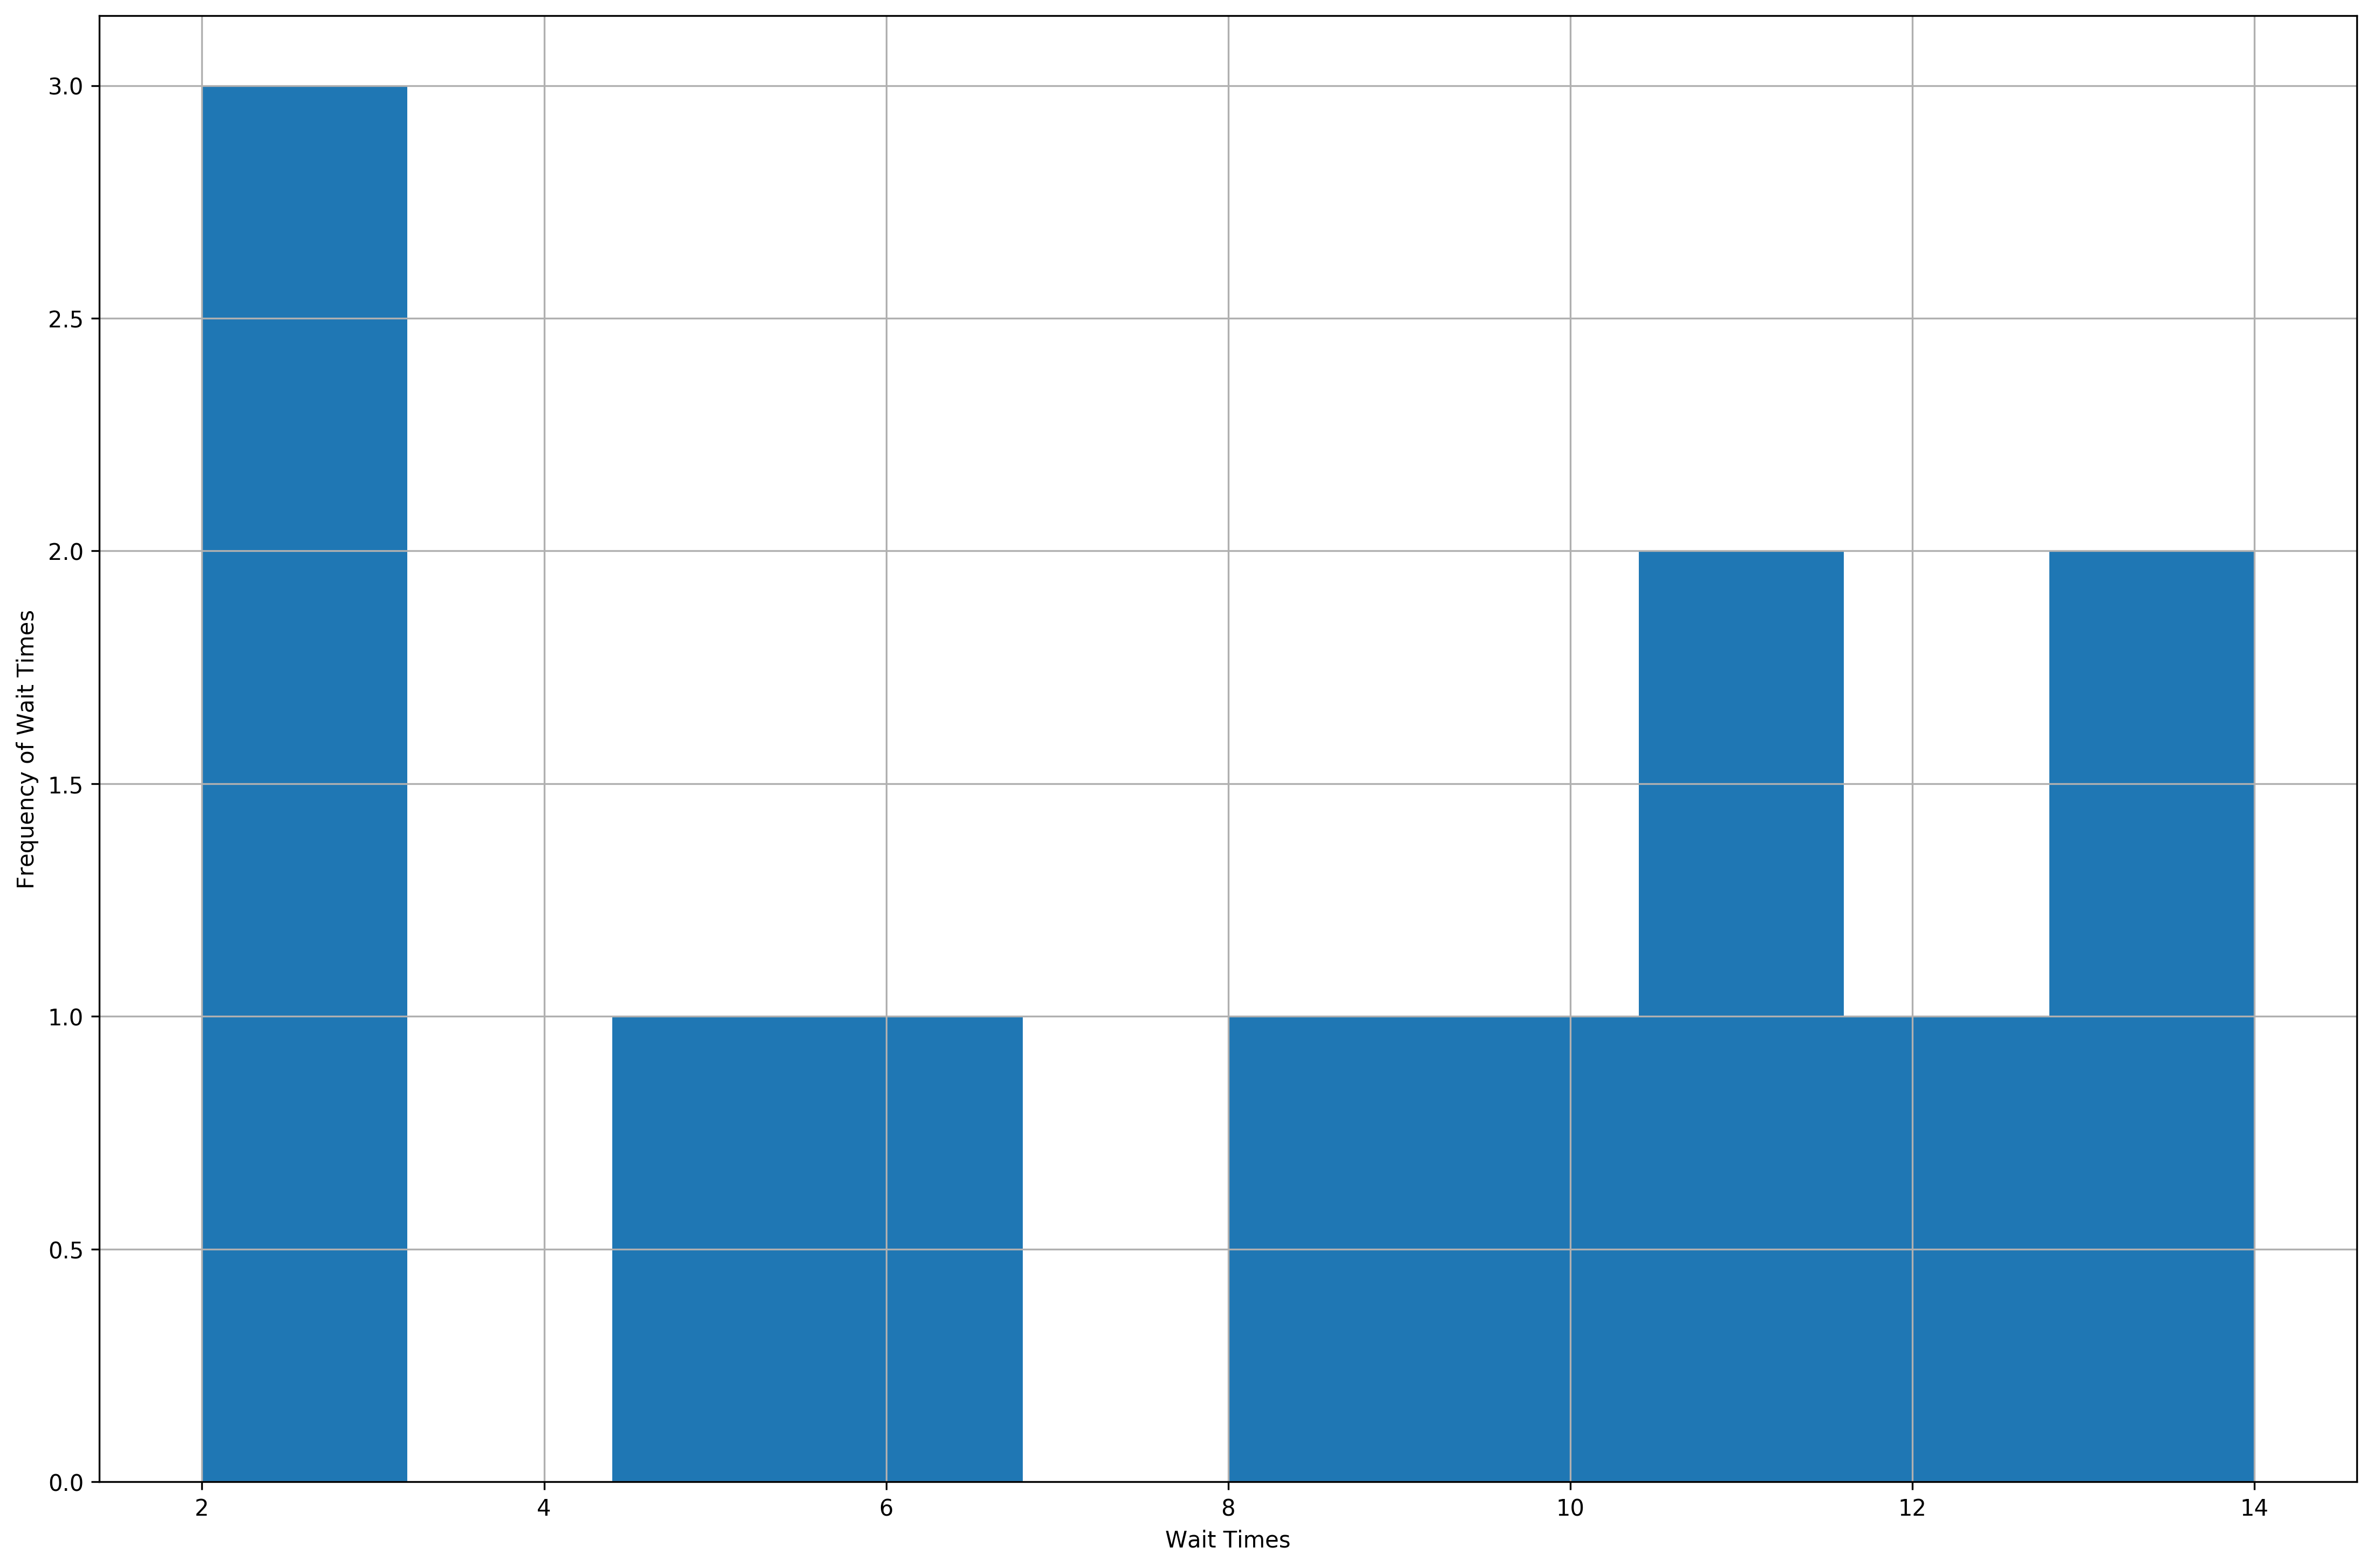

In [67]:
fig, ax = plt.subplots(1, 1)
ax.hist(patients['wait_time'])
ax.set_xlabel('Wait Times')
ax.set_ylabel('Frequency of Wait Times')
ax.grid()
plt.show();

### With SQL

In [70]:
patients = pd.DataFrame(np.array([
    [0, 5],
    [7, 6],
    [9, 7],
    [12, 6],
    [18, 5],
    [22, 2],
    [25, 4],
    [30, 3],
    [36, 4],
    [45, 2],
    [51, 2],
    [55, 3]
]), columns=['arrival_time', 'service_time'], dtype=int)

pysqldf = lambda q: pdsql.sqldf(q, globals())
pysqldf("SELECT * FROM patients LIMIT 10;").head()

,arrival_time,service_time
0,0,5
1,7,6
2,9,7
3,12,6
4,18,5


In [73]:
pysqldf(
    '''
    SELECT 
        p.arrival_time, 
        p.service_time,
        0 AS end_time
    FROM patients AS p
    '''
)

,arrival_time,service_time,end_time
0,0,5,0
1,7,6,0
2,9,7,0
3,12,6,0
4,18,5,0
5,22,2,0
6,25,4,0
7,30,3,0
8,36,4,0
9,45,2,0
